# Import des modules, données et préparation des informations des données sur différentes races de chien

In [6]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Chemin principal
main_folder = r'C:\Users\pdevi\OneDrive\Desktop\OpenClassrooms\Projet_5\Images'


# Fonction pour récupérer les races et compter le nombre d'images par race
def get_race_info(main_folder):
    race_info = {}
    total_nb_images=0
    for folder_name in os.listdir(main_folder):
        if '-' in folder_name:
            race_name = folder_name.split('-')[-1]  # Récupérer le nom de la race après '-'
            race_folder = os.path.join(main_folder, folder_name)
            image_files = [f for f in os.listdir(race_folder) if os.path.isfile(os.path.join(race_folder, f))]
            if image_files:
                race_info[race_name] = {
                    'example_image': os.path.join(race_folder, image_files[0]),  # Première image comme exemple
                    'image_count': len(image_files)  # Compter les images dans le dossier
                }
            total_nb_images+=len(image_files)
                
    return race_info,total_nb_images

# Fonction pour afficher les informations de chaque race
def display_race_info(race_info):
    print(f"Nombre de races de chiens dans Stanford Dogs Dataset : {len(race_info)}")

    for race, info in race_info.items():
        print(f"Race: {race}")
        print(f"Nombre d'images: {info['image_count']}")
        img = mpimg.imread(info['example_image'])
        plt.figure()
        plt.imshow(img)
        plt.title(f"Exemple: {race}")
        plt.axis('off')  # Masquer les axes
        plt.show()

# Obtenir les informations sur les races
race_info,nb_images = get_race_info(main_folder)

print(f"Nombre d'images dans Stanford Dogs Dataset : {nb_images}")

# Afficher les informations sur les races
# display_race_info(race_info)


Nombre d'images dans Stanford Dogs Dataset : 20580


## 1. Répartition des races de chiens

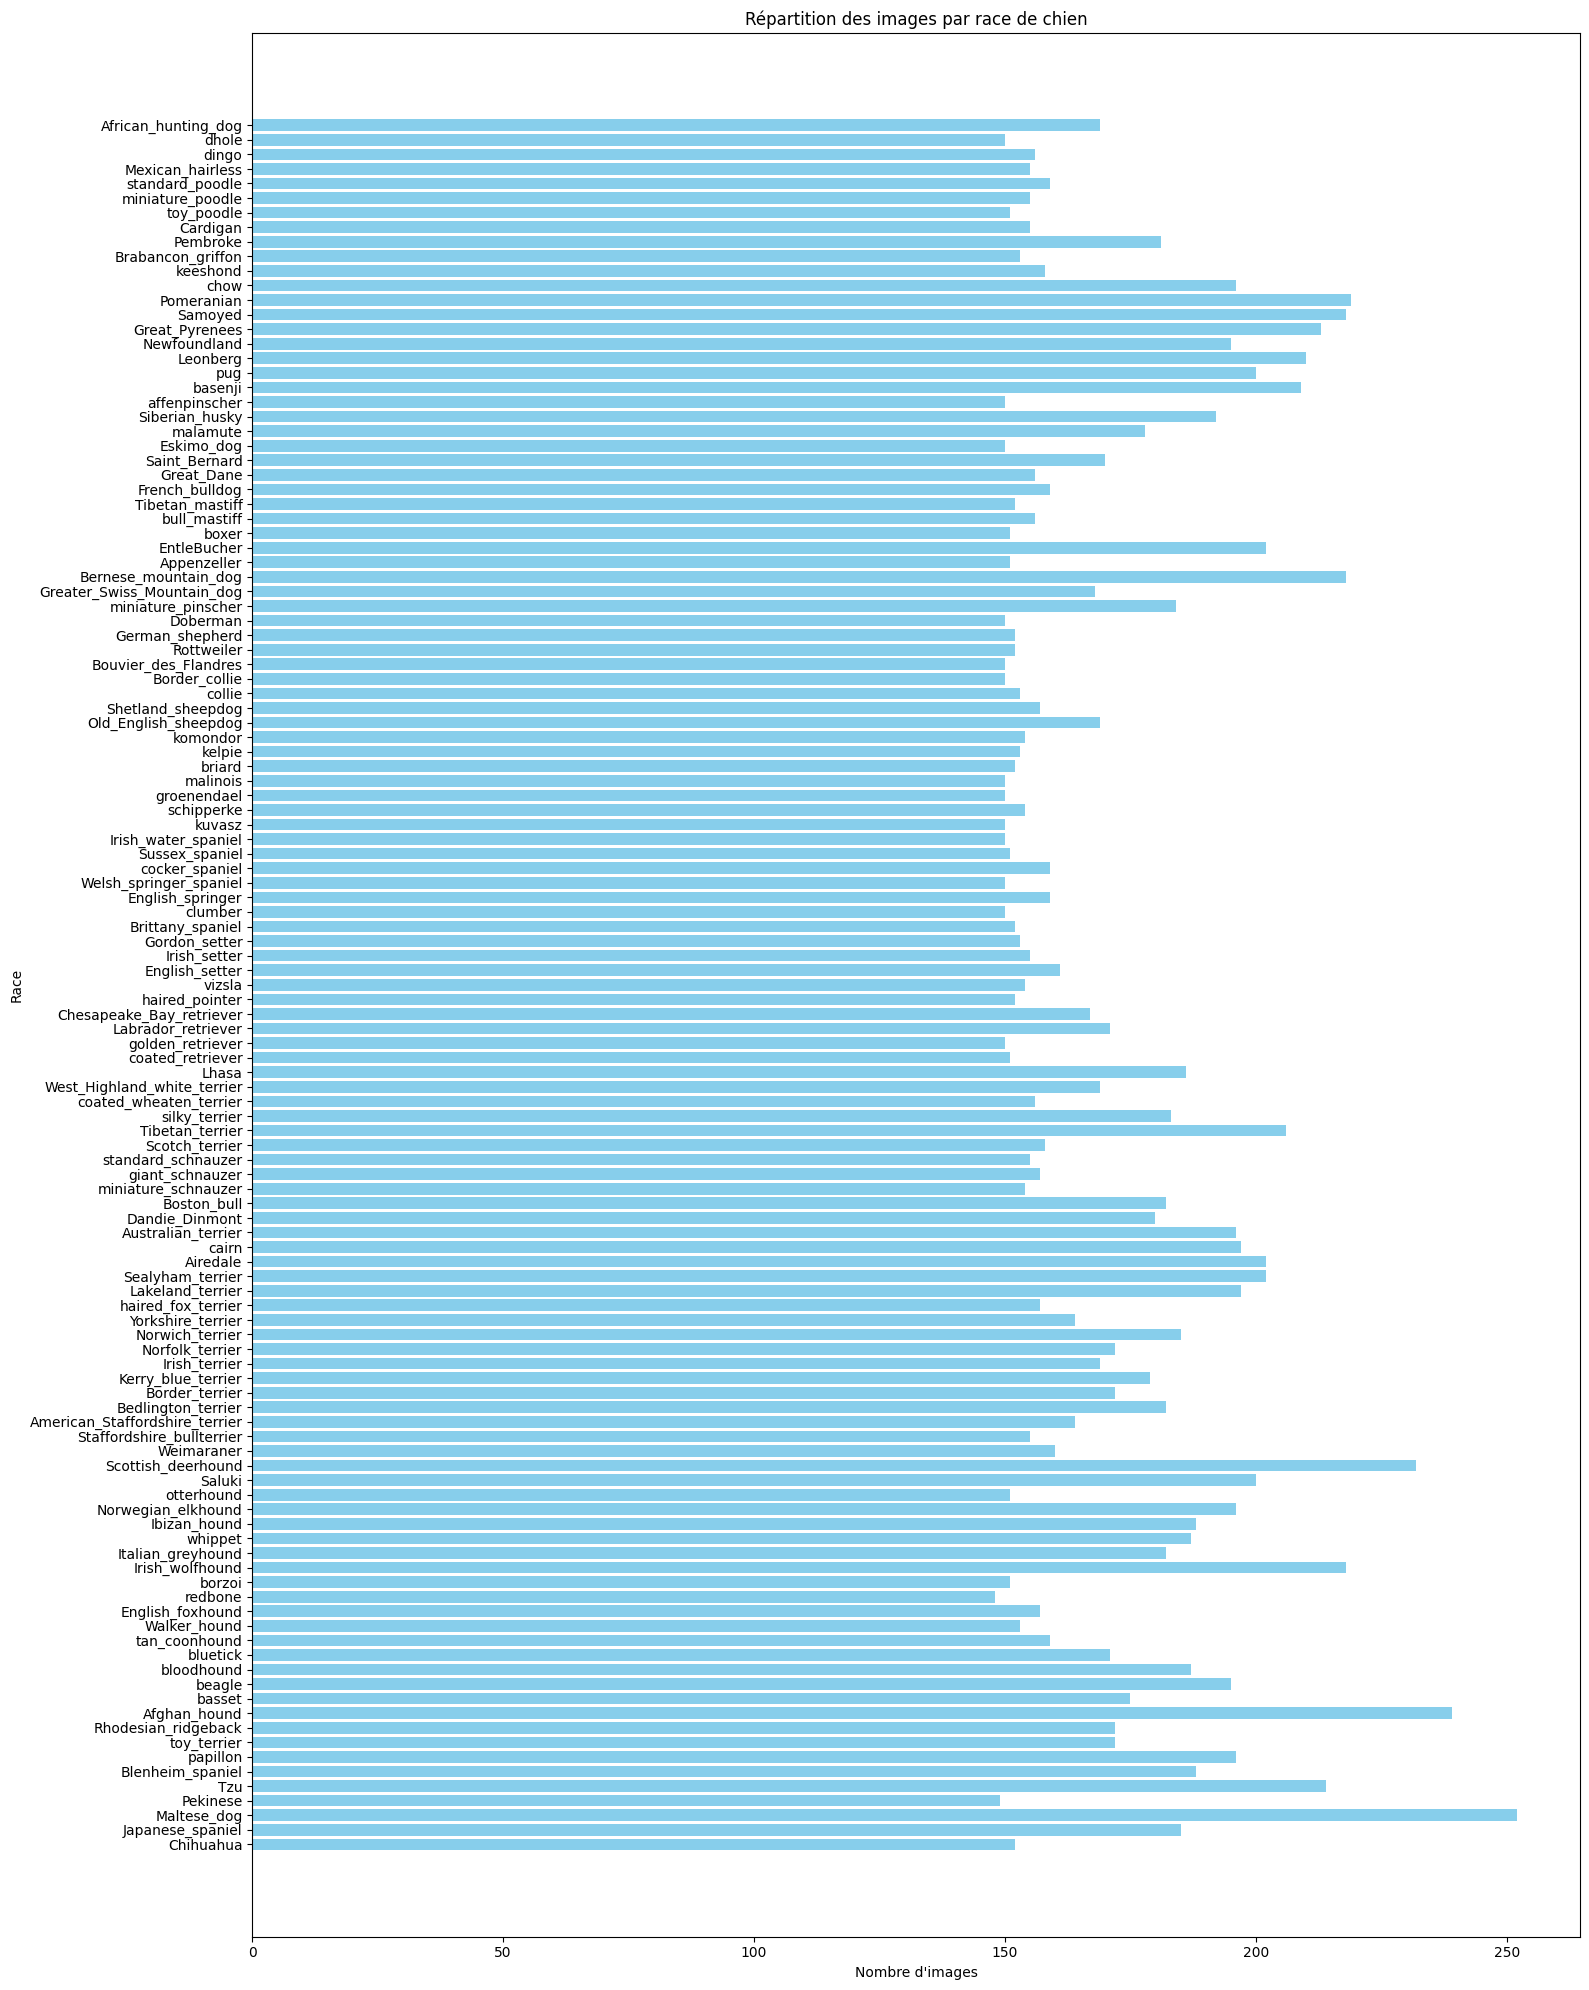

In [2]:
import matplotlib.pyplot as plt

# Récupérer les races et le nombre d'images pour chaque race
races = list(race_info.keys())
image_counts = [info['image_count'] for info in race_info.values()]

# Tracer un histogramme pour visualiser la répartition
plt.figure(figsize=(16, 20))
plt.barh(races, image_counts, color='skyblue')
plt.xlabel('Nombre d\'images')
plt.ylabel('Race')
plt.title('Répartition des images par race de chien')
plt.tight_layout()
plt.show()


## 2. Taille des images

In [3]:
from PIL import Image

def get_image_sizes(race_info):
    sizes = {}
    for race, info in race_info.items():
        img = Image.open(info['example_image'])
        sizes[race] = img.size
    return sizes

# Obtenir la taille des images pour chaque race
image_sizes = get_image_sizes(race_info)

# Afficher les tailles d'image
for race, size in image_sizes.items():
    print(f"Race: {race}, Taille de l'image: {size}")


Race: Chihuahua, Taille de l'image: (333, 500)
Race: Japanese_spaniel, Taille de l'image: (500, 375)
Race: Maltese_dog, Taille de l'image: (500, 375)
Race: Pekinese, Taille de l'image: (250, 172)
Race: Tzu, Taille de l'image: (500, 375)
Race: Blenheim_spaniel, Taille de l'image: (333, 500)
Race: papillon, Taille de l'image: (500, 357)
Race: toy_terrier, Taille de l'image: (500, 375)
Race: Rhodesian_ridgeback, Taille de l'image: (320, 258)
Race: Afghan_hound, Taille de l'image: (348, 500)
Race: basset, Taille de l'image: (320, 240)
Race: beagle, Taille de l'image: (375, 500)
Race: bloodhound, Taille de l'image: (500, 333)
Race: bluetick, Taille de l'image: (339, 500)
Race: tan_coonhound, Taille de l'image: (500, 375)
Race: Walker_hound, Taille de l'image: (300, 311)
Race: English_foxhound, Taille de l'image: (300, 256)
Race: redbone, Taille de l'image: (500, 333)
Race: borzoi, Taille de l'image: (500, 423)
Race: Irish_wolfhound, Taille de l'image: (500, 302)
Race: Italian_greyhound, Tai

### Distribution des dimensions d'images

C:\Users\pdevi\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


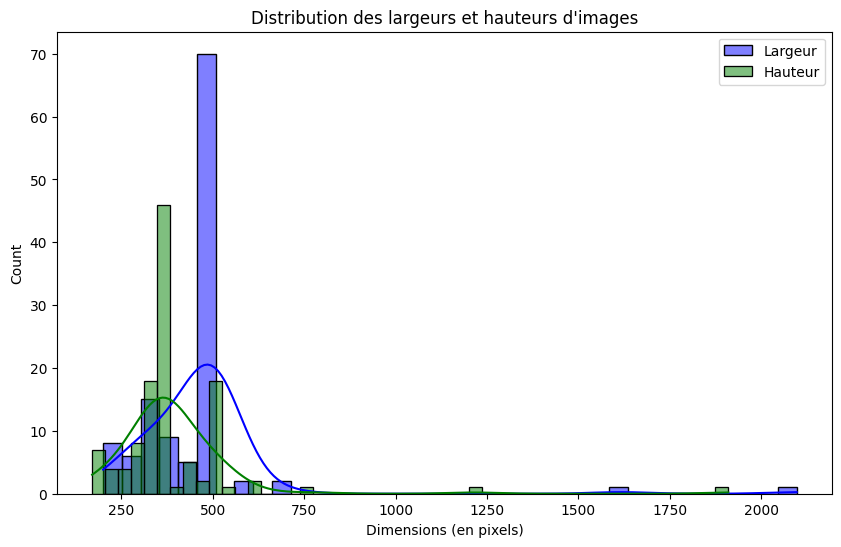

In [4]:
import seaborn as sns

# Extraire les largeurs et hauteurs des images
widths = [size[0] for size in image_sizes.values()]
heights = [size[1] for size in image_sizes.values()]

# Tracer la distribution des largeurs et hauteurs d'images
plt.figure(figsize=(10, 6))
sns.histplot(widths, color='blue', label='Largeur', kde=True)
sns.histplot(heights, color='green', label='Hauteur', kde=True)
plt.xlabel('Dimensions (en pixels)')
plt.title('Distribution des largeurs et hauteurs d\'images')
plt.legend()
plt.show()


# Code pour le traitement d'images et la visualisation des histogrammes

In [5]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from shutil import copytree, ignore_patterns

# Chemin principal contenant les images
main_folder = r'C:\Users\pdevi\OneDrive\Desktop\OpenClassrooms\Projet_5\Images'
output_folder_rgb = r'C:\Users\pdevi\OneDrive\Desktop\OpenClassrooms\Projet_5\Images_rgb'

# Créer des répertoires pour les versions noir et blanc et RGB
os.makedirs(output_folder_rgb, exist_ok=True)

# Taille uniforme pour toutes les images
uniform_size = (224, 224)  # Largeur, Hauteur

# Fonction pour redimensionner l'image à une taille uniforme
def resize_image(image, size):
    return cv2.resize(image, size)

# Fonction pour appliquer différentes transformations sur une image
def apply_transformations(image):
    # Originale
    original = image.copy()

    # Crop (recadrage)
    h, w = image.shape[:2]
    cropped = image[int(h*0.1):int(h*0.9), int(w*0.1):int(w*0.9)]
    cropped=resize_image(cropped,uniform_size)
    # Mirroring (symétrie horizontale)
    mirrored = cv2.flip(image, 1)

    mean = np.mean(image, axis=(0, 1), keepdims=True)
    stddev = np.std(image, axis=(0, 1), keepdims=True)
    whitening = (image - mean) / (stddev + 1e-6)

    # Recaler l'image pour l'amener dans la plage [0, 224]
    whitening = cv2.normalize(whitening, None, 0, 224, cv2.NORM_MINMAX)
    whitening = whitening.astype(np.uint8)

    # Contraste (en utilisant histogramme equalization sur le canal Y)
    grayscale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    contrast = cv2.equalizeHist(grayscale)

    # Equalization (égalisation des couleurs sur les canaux)
    yuv_img = cv2.cvtColor(image, cv2.COLOR_BGR2YUV)
    yuv_img[:, :, 0] = cv2.equalizeHist(yuv_img[:, :, 0])
    equalized = cv2.cvtColor(yuv_img, cv2.COLOR_YUV2BGR)

    # Débruitage
    denoised = cv2.fastNlMeansDenoisingColored(image, None, 10, 10, 7, 21)

    # Flipped versions
    flipped_upside_down = cv2.flip(image, 0)  # Flip upside down (vertical flip)
    flipped_right = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)  # Rotate 90 degrees to the right
    flipped_left = cv2.rotate(image, cv2.ROTATE_90_COUNTERCLOCKWISE)  # Rotate 90 degrees to the left

    return {
        'Original': original,
        'Cropped': cropped,
        'Mirrored': mirrored,
        'Whitening': whitening,
        'Contrasted': contrast,
        'Equalized': equalized,
        'Denoised': denoised,
        'Flipped_UD': flipped_upside_down,  # Added flipped upside down
        'Flipped_Right': flipped_right,     # Added flipped right
        'Flipped_Left': flipped_left        # Added flipped left
    }
# Fonction pour appliquer les transformations et sauvegarder les images
def apply_transformations_and_save(image, race_folder, image_name):
    # Appliquer les transformations
    resized_image = resize_image(image, uniform_size)

    transformations = apply_transformations(resized_image)

    # Sauvegarder chaque image transformée dans le bon dossier
    for name, transformed_img in transformations.items():


        file_path = os.path.join(race_folder, f"{image_name}_{name}_rgb.jpg")
        
        # Sauvegarder l'image transformée
        cv2.imwrite(file_path, transformed_img)

# Fonction pour copier et traiter les dossiers
def process_race_folders(race_info):
    rgb_distributions = {}
    limited_race_info = dict(list(race_info.items())[:5])
    print(type(race_info))
    for race, info in limited_race_info.items():
    # for race, info in race_info.items():
        print(f"Processing race: {race}")

        # Créer un nouveau dossier pour la race (noir et blanc)
        race_folder_rgb = os.path.join(output_folder_rgb, race)
        os.makedirs(race_folder_rgb, exist_ok=True)
        
        # Charger toutes les images de la race
        race_folder = os.path.dirname(info['example_image'])
        image_files = [f for f in os.listdir(race_folder) if os.path.isfile(os.path.join(race_folder, f))]

        for img_file in image_files:
            img_path = os.path.join(race_folder, img_file)
            image = cv2.imread(img_path)
            image_name = os.path.splitext(img_file)[0]

            # Appliquer les transformations et sauvegarder 
            apply_transformations_and_save(image, race_folder_rgb, image_name)
        
        # Calculer la distribution RGB pour cette race
        rgb_distributions[race] = compute_rgb_distribution(race_folder_rgb)
    
    # Comparer les distributions entre races
    compare_rgb_distributions(rgb_distributions)

# Fonction pour calculer la distribution RGB
def compute_rgb_distribution(race_folder):
    rgb_values = []

    for img_file in os.listdir(race_folder):
        img_path = os.path.join(race_folder, img_file)
        img = cv2.imread(img_path)
        
        if img is not None:
            # Récupérer les valeurs des canaux R, G, B
            r, g, b = cv2.split(img)
            rgb_values.append((r.mean(), g.mean(), b.mean(), r.std(), g.std(), b.std()))
    
    return np.array(rgb_values)

# Fonction pour comparer les distributions de couleurs entre races
def compare_rgb_distributions(rgb_distributions):
    for race, rgb_data in rgb_distributions.items():
        mean_r = rgb_data[:, 0].mean()
        mean_g = rgb_data[:, 1].mean()
        mean_b = rgb_data[:, 2].mean()
        std_r = rgb_data[:, 3].mean()
        std_g = rgb_data[:, 4].mean()
        std_b = rgb_data[:, 5].mean()

        print(f"Race: {race}")
        print(f"Mean R: {mean_r}, Mean G: {mean_g}, Mean B: {mean_b}")
        print(f"Std R: {std_r}, Std G: {std_g}, Std B: {std_b}")

        # Visualisation de la distribution 2D des couleurs
        plt.figure(figsize=(8, 6))
        plt.scatter(rgb_data[:, 0], rgb_data[:, 1], color='red', label='Red-Green')
        plt.scatter(rgb_data[:, 1], rgb_data[:, 2], color='blue', label='Green-Blue')
        plt.scatter(rgb_data[:, 0], rgb_data[:, 2], color='green', label='Red-Blue')
        plt.xlabel('Channel Intensity')
        plt.ylabel('Channel Intensity')
        plt.title(f'Distribution 2D des couleurs RGB pour {race}')
        plt.legend()
        plt.tight_layout()
        plt.show()

# Obtenir les informations sur les races
race_info,nb_images = get_race_info(main_folder)

# Traiter les dossiers et sauvegarder les versions transformées
process_race_folders(race_info)



<class 'dict'>
Processing race: Chihuahua
Processing race: Japanese_spaniel


KeyboardInterrupt: 

## Comparaison du nombre d'images avant data augmentation et après data augmentation

In [ ]:
import os

# Chemin principal contenant les images originales et augmentées
main_folder = r'C:\Users\pdevi\OneDrive\Desktop\OpenClassrooms\Projet_5\Images'
output_folder_rgb = r'C:\Users\pdevi\OneDrive\Desktop\OpenClassrooms\Projet_5\Images_rgb'

# Fonction pour compter le nombre d'images dans un dossier donné
def count_images_in_folder(folder):
    image_extensions = ['.jpg', '.jpeg', '.png', '.bmp']
    return len([f for f in os.listdir(folder) if os.path.splitext(f)[1].lower() in image_extensions])

# Fonction pour afficher le nombre d'images avant et après augmentation pour chaque race
def show_images_count_before_after(race_info):
    limited_race_info = dict(list(race_info.items())[:5])
    for race, info in limited_race_info.items():
        print(f"Processing race: {race}")
        
        # Chemin du dossier original et des dossiers augmentés
        race_folder_original = os.path.dirname(info['example_image'])
        race_folder_rgb = os.path.join(output_folder_rgb, race)

        # Compter le nombre d'images dans chaque dossier
        num_images_before = count_images_in_folder(race_folder_original)
        num_images_rgb = count_images_in_folder(race_folder_rgb)

        # Afficher les résultats
        print(f"Race: {race}")
        print(f"  Nombre d'images avant augmentation: {num_images_before}")
        print(f"  Nombre d'images après augmentation (RGB): {num_images_rgb}")
        print()

# Obtenir les informations sur les races (comme dans le code précédent)
race_info,nb_images = get_race_info(main_folder)

# Afficher le nombre d'images avant et après augmentation pour chaque race
show_images_count_before_after(race_info)
